# Model Evaluation
This notebook computes detailed evaluation metrics for a given model (precision, recall, confusion matrix, etc.)

Input format: Model prediction scores and true labels in csv format.

In [65]:
# Imports
import copy
import random
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics

In [2]:
# mount drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
df = pd.read_csv(r'/content/drive/MyDrive/CS230/output.csv', header=None)
test_labels = np.load('/content/drive/MyDrive/CS230/labels_test.npy', allow_pickle=False)
assert len(df) == len(test_labels)
NUM_TOTAL = len(df)

In [59]:
# Construct dataset
predictions = {}
labels = {}
predictions_list = []
labels_list = []
for i in range(len(df)):
  # This is a hack, TODO: implement better parsing
  simulation, timestep = eval(df.iloc[i][0])
  pred_float, label = df.iloc[i][1].strip(")(").split(",")
  pred_float = float(pred_float)
  pred = 1 if pred_float > 0.01 else 0
  label = int(label[-2])
  predictions[(simulation, timestep)] = pred
  labels[(simulation, timestep)] = label
  predictions_list.append(pred_float)
  labels_list.append(label)

In [60]:
true_positives = []
false_positives = []
true_negatives = []
false_negatives = []
for k in predictions.keys():
  pred = predictions[k]
  label = labels[k]
  if pred == label and label == 1:
    true_positives.append(k)
  elif pred == label and label == 0:
    true_negatives.append(k)
  elif pred != label and label == 1:
    false_negatives.append(k)
  elif pred != label and label == 0:
    false_positives.append(k)
  else:
    assert False

num_tp = len(true_positives)
num_fp = len(false_positives)
num_tn = len(true_negatives)
num_fn = len(false_negatives)

print("True Positives: %d (%2.2f%%)" % (num_tp, 100 * num_tp / NUM_TOTAL))
print("True Negatives: %d (%2.2f%%)" %  (num_tn, 100 * num_tn / NUM_TOTAL))
print("False Positives: %d (%2.2f%%)" %  (num_fp, 100 * num_fp / NUM_TOTAL))
print("False Negatives: %d (%2.2f%%)" %  (num_fn, 100 * num_fn / NUM_TOTAL))

True Positives: 147 (37.03%)
True Negatives: 66 (16.62%)
False Positives: 183 (46.10%)
False Negatives: 1 (0.25%)


In [61]:
print("Example false negatives:" )
print(false_negatives)
print("Example false positives:" )
print(false_positives)

Example false negatives:
[(9, 7)]
Example false positives:
[(4926, 9), (28, 4), (325, 9), (5044, 9), (6004, 9), (4781, 9), (696, 9), (39, 7), (271, 9), (411, 9), (550, 9), (32, 5), (5023, 9), (147, 9), (4927, 9), (4737, 8), (354, 9), (6273, 9), (676, 9), (45, 8), (809, 9), (4732, 2), (4741, 3), (201, 9), (6189, 9), (185, 9), (27, 2), (5016, 9), (27, 4), (252, 9), (959, 9), (4735, 5), (4733, 9), (6208, 9), (702, 9), (6094, 9), (2, 8), (963, 9), (453, 9), (4726, 3), (5031, 9), (4734, 5), (6375, 9), (207, 9), (678, 9), (822, 9), (62, 9), (875, 9), (31, 2), (104, 9), (6244, 9), (6155, 9), (892, 9), (6132, 9), (303, 9), (6279, 9), (951, 9), (661, 9), (285, 9), (4874, 9), (366, 9), (6351, 9), (746, 9), (749, 9), (693, 9), (837, 9), (397, 9), (479, 9), (244, 9), (6077, 9), (6089, 9), (4737, 5), (6371, 9), (741, 9), (399, 9), (735, 9), (445, 9), (6005, 9), (427, 9), (6188, 9), (4726, 5), (153, 9), (825, 9), (327, 9), (283, 9), (905, 9), (208, 9), (952, 9), (6007, 9), (946, 9), (978, 9), (4731,

In [70]:
# Compute statistics
accuracy = (num_tp + num_tn) / NUM_TOTAL
precision = num_tp / (num_tp + num_fp)
recall = num_tp / (num_tp + num_fn)
f1_score = (2 * precision * recall) / (precision + recall)
fpr, tpr, thresholds = metrics.roc_curve(labels_list, predictions_list, pos_label=1)
auc = metrics.auc(fpr, tpr)

print("Accuracy: %.3f" % (1 * accuracy))
print("Precision: %.3f" % (1 * precision))
print("Recall: %.3f" % (1 * recall))
print("F1 Score: %.3f" % (1 * f1_score))
print("AUC: %.3f" % (1 * auc))

Accuracy: 0.537
Precision: 0.445
Recall: 0.993
F1 Score: 0.615
AUC: 0.955


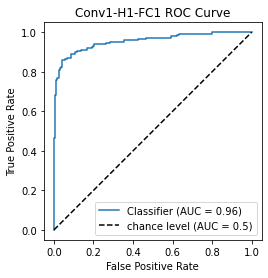

In [71]:
RocCurveDisplay.from_predictions(
    labels_list, predictions_list,
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Conv1-H1-FC1 ROC Curve")
plt.legend()
plt.show()